<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/Find_best_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn
from torch import tensor
from torch.nn import Linear,ReLU,Sigmoid
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns

# data

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

bos = load_boston()
df = pd.DataFrame(bos.data)
df.columns = bos.feature_names
df['Price'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 特徵縮放

In [4]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Price',axis=1)
y = df['Price']

mm = MinMaxScaler().fit(X)
X[:] = mm.transform(X[:])

X.join(y).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


# 向量化

In [0]:
X = X.to_numpy()
Y = y.to_numpy()

# 切分資料集

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


# tensor化

In [7]:
n_train = X_train.shape[0]
X_train = torch.tensor(X_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

torch.Size([354, 13])
torch.Size([152, 13])
torch.Size([354, 1])
torch.Size([152, 1])


# Construct the neural network

In [8]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,256),ReLU(),
      Linear(256,128),ReLU(),
      Linear(128,64),ReLU(),
      Linear(64,32),ReLU(),
      Linear(32,16),ReLU(),
      Linear(16,8),ReLU(),
      Linear(8,output_shape)
      )
  return net

def init_weights(m):
  if type(m) == nn.Linear:
    torch.nn.init.xavier_uniform(m.weight)
    m.bias.data.fill_(0)

net = build_net(X_train.shape[1],Y_train.shape[1])
net.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=13, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=16, bias=True)
  (9): ReLU()
  (10): Linear(in_features=16, out_features=8, bias=True)
  (11): ReLU()
  (12): Linear(in_features=8, out_features=1, bias=True)
)

In [9]:
# test
mini_batch = X_train[0:5]
net(mini_batch)

tensor([[-0.0049],
        [-0.0136],
        [-0.0039],
        [-0.0045],
        [-0.0165]], grad_fn=<AddmmBackward>)

# The usage of DataLoader

In [0]:
datasets = torch.utils.data.TensorDataset(X_train, Y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=128, shuffle=True)

# Loss function and optimizer

In [0]:
loss_function = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(),lr=0.00015)

# Training and evaluation

In [0]:
def train(net,train_iter,loss_function,optimizer,num_epochs=500):
  history = []
  for epoch in range(num_epochs):
    for x,y in train_iter:
      loss = loss_function(net(x),y)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss 524.7186
epochs 1 loss 665.3191
epochs 2 loss 634.7819
epochs 3 loss 616.2831
epochs 4 loss 677.3748
epochs 5 loss 536.5837
epochs 6 loss 532.3870
epochs 7 loss 723.4990
epochs 8 loss 599.9229
epochs 9 loss 573.5732
epochs 10 loss 653.8145
epochs 11 loss 604.2202
epochs 12 loss 782.6929
epochs 13 loss 594.1732
epochs 14 loss 633.3320
epochs 15 loss 598.3915
epochs 16 loss 559.9291
epochs 17 loss 681.6030
epochs 18 loss 593.3087
epochs 19 loss 551.9387
epochs 20 loss 635.8689
epochs 21 loss 649.2079
epochs 22 loss 667.4407
epochs 23 loss 608.6653
epochs 24 loss 654.1654
epochs 25 loss 574.8045
epochs 26 loss 518.4185
epochs 27 loss 644.8282
epochs 28 loss 561.1221
epochs 29 loss 647.0688
epochs 30 loss 508.3485
epochs 31 loss 618.4195
epochs 32 loss 548.4077
epochs 33 loss 568.1593
epochs 34 loss 548.3837
epochs 35 loss 476.7069
epochs 36 loss 621.9440
epochs 37 loss 553.3243
epochs 38 loss 572.4840
epochs 39 loss 569.0938
epochs 40 loss 582.5044
epochs 41 loss 464.5679
ep

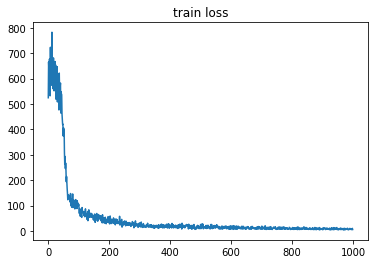

In [13]:
net = train(net,train_iter,loss_function,optimizer,1000)

In [14]:
from sklearn.metrics import r2_score

y_pred = net(X_test).detach().numpy().ravel()
y_real = Y_test.numpy().ravel()
print(y_pred.shape,y_real.shape)
r2_score(y_real,y_pred)

(152,) (152,)


0.850066974614267

In [0]:
price_model = net

# find the what condition can make high price 

In [0]:
def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,128),
      Linear(128,output_shape),
      Sigmoid()
      )
  return net

In [17]:
net = build_net(10,X_train.shape[1])
net.apply(init_weights)
net

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  from ipykernel import kernelapp as app


Sequential(
  (0): Linear(in_features=10, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=13, bias=True)
  (2): Sigmoid()
)

In [18]:
noise = torch.tensor(np.random.normal(size=(5000,10)), dtype=torch.float)
noise_datasets = torch.utils.data.TensorDataset(noise)
noise_iter = torch.utils.data.DataLoader(noise_datasets,batch_size=128)
noise_iter

In [19]:
obj_function = lambda x:price_model(x).mean()
obj_function

<function __main__.<lambda>>

In [0]:
optimizer = optim.Adam(net.parameters(),lr=0.0001)

In [0]:
def train2(net,noise_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for noise in noise_iter:
      loss = obj_function(net(noise[0]))
      loss *= -1
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  # return trained net
  return net

epochs 0 loss -7.0002
epochs 1 loss -8.3125
epochs 2 loss -9.9682
epochs 3 loss -12.0223
epochs 4 loss -14.7813
epochs 5 loss -18.2376
epochs 6 loss -22.0392
epochs 7 loss -26.1406
epochs 8 loss -30.3954
epochs 9 loss -34.4938
epochs 10 loss -38.3577
epochs 11 loss -41.9372
epochs 12 loss -45.1206
epochs 13 loss -47.9333
epochs 14 loss -50.4490
epochs 15 loss -52.6632
epochs 16 loss -54.6458
epochs 17 loss -56.3953
epochs 18 loss -57.9649
epochs 19 loss -59.3910
epochs 20 loss -60.6531
epochs 21 loss -61.7776
epochs 22 loss -62.7714
epochs 23 loss -63.6547
epochs 24 loss -64.4440
epochs 25 loss -65.1388
epochs 26 loss -65.7399
epochs 27 loss -66.2792
epochs 28 loss -66.7553
epochs 29 loss -67.1823
epochs 30 loss -67.5618
epochs 31 loss -67.9009
epochs 32 loss -68.2283
epochs 33 loss -68.5819
epochs 34 loss -69.1073
epochs 35 loss -69.8256
epochs 36 loss -70.8700
epochs 37 loss -72.4107
epochs 38 loss -74.8443
epochs 39 loss -76.5575
epochs 40 loss -77.4742
epochs 41 loss -78.0387
epoch

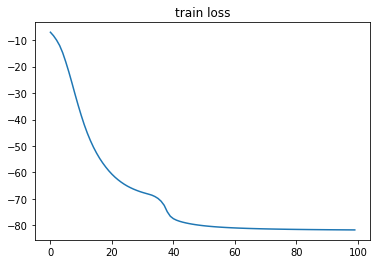

In [22]:
G = train2(net,noise_iter,obj_function,optimizer,num_epochs=100)

In [23]:
a = pd.DataFrame(G(noise).detach().numpy(),columns = bos.feature_names)
b = pd.Series(price_model(G(noise)).detach().numpy().ravel(),name='Price')

a[:] = mm.inverse_transform(a[:])
res = a.join(b)
res = round(res,2) 
res

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.12,99.720001,27.389999,0.99,0.39,8.78,2.92,1.15,23.959999,187.169998,12.61,396.440002,1.77,81.680000
1,0.16,99.830002,27.580000,1.00,0.39,8.78,3.01,1.14,23.959999,187.470001,12.61,396.369995,1.76,81.720001
2,0.10,99.739998,27.389999,1.00,0.39,8.78,3.01,1.14,23.959999,187.320007,12.61,396.519989,1.78,81.690002
3,0.11,99.720001,27.510000,1.00,0.39,8.78,3.05,1.14,23.959999,187.429993,12.62,396.390015,1.77,81.699997
4,0.12,99.730003,27.350000,1.00,0.39,8.78,2.94,1.14,23.969999,187.240005,12.61,396.369995,1.77,81.699997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.14,99.650002,27.430000,1.00,0.39,8.78,2.96,1.14,23.969999,187.289993,12.61,396.390015,1.76,81.709999
4996,0.14,99.860001,27.629999,1.00,0.39,8.78,2.94,1.14,23.980000,187.330002,12.61,396.350006,1.76,81.739998
4997,0.13,99.870003,27.660000,1.00,0.39,8.78,3.03,1.14,23.980000,187.589996,12.61,396.279999,1.76,81.739998
4998,0.17,99.900002,27.680000,1.00,0.39,8.77,3.09,1.14,23.980000,187.759995,12.61,396.179993,1.76,81.709999


In [24]:
res.loc[[res['Price'].argmax()]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
237,0.13,99.860001,27.66,1.0,0.39,8.78,3.08,1.14,23.99,187.690002,12.61,396.350006,1.75,81.75


In [0]:
res = res.sample(len(df))

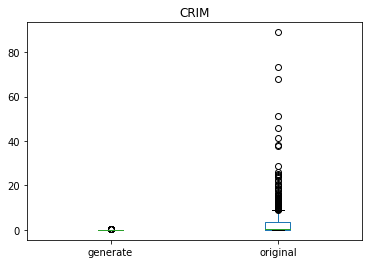

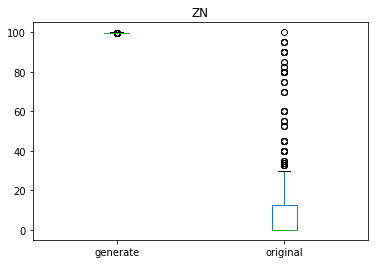

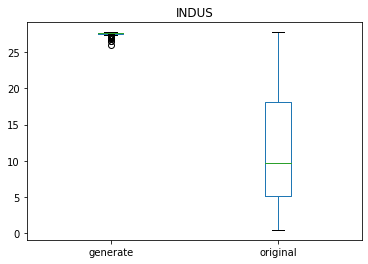

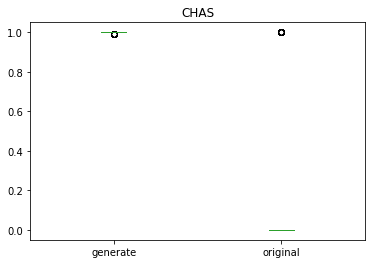

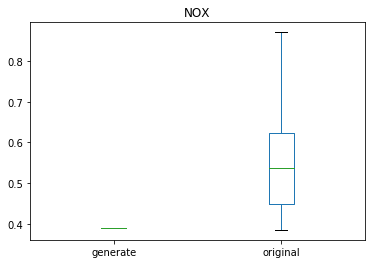

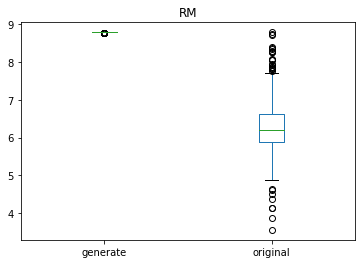

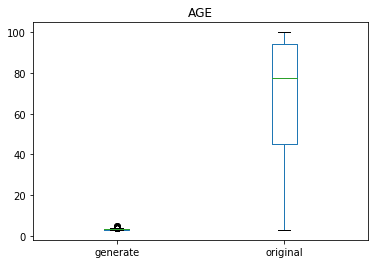

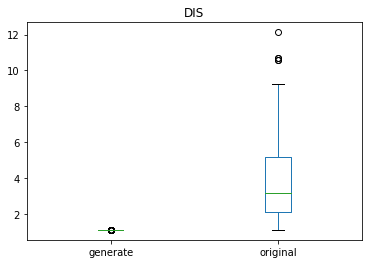

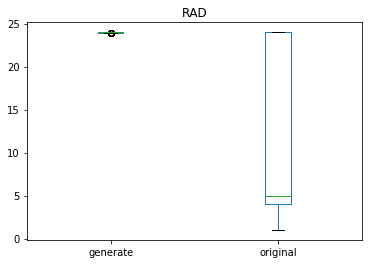

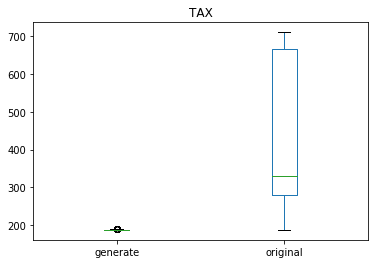

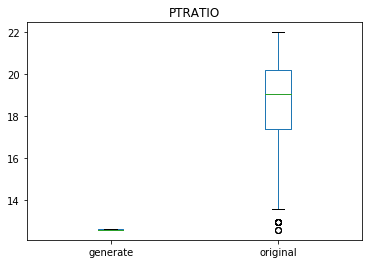

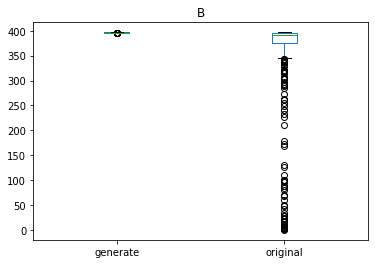

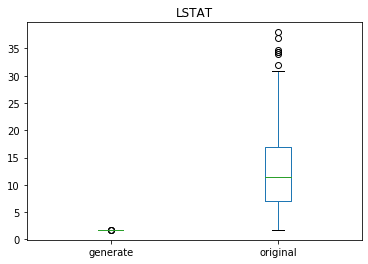

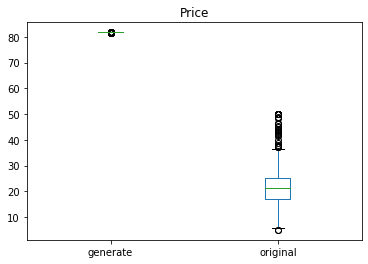

In [26]:
for i in res.columns:
  plot_data = pd.concat([res[i],df[i]],axis=1)
  plot_data.columns = ['generate','original'] 
  plot_data.plot(kind='box')
  plt.title(i)
  plt.show()